# Logistic Regression with non-linear features

## import library

In [673]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib import ticker, cm

## load training data

In [674]:
fname_data1 = 'assignment_09_data1.txt'
fname_data2 = 'assignment_09_data2.txt'

data1        = np.genfromtxt(fname_data1, delimiter=',')
data2        = np.genfromtxt(fname_data2, delimiter=',')

number_data1 = data1.shape[0]
number_data2 = data2.shape[0]

data1_point     = data1[:, 0:2]
data1_point_x   = data1_point[:, 0]
data1_point_y   = data1_point[:, 1]
data1_label     = data1[:, 2]

data2_point     = data2[:, 0:2]
data2_point_x   = data2_point[:, 0]
data2_point_y   = data2_point[:, 1]
data2_label     = data2[:, 2]

data1_label_class_0     = (data1_label == 0)
data1_label_class_1     = (data1_label == 1)

data2_label_class_0     = (data2_label == 0)
data2_label_class_1     = (data2_label == 1)

data1_point_x_class_0   = data1_point_x[data1_label_class_0]
data1_point_y_class_0   = data1_point_y[data1_label_class_0]

data1_point_x_class_1   = data1_point_x[data1_label_class_1]
data1_point_y_class_1   = data1_point_y[data1_label_class_1]

data2_point_x_class_0   = data2_point_x[data2_label_class_0]
data2_point_y_class_0   = data2_point_y[data2_label_class_0]

data2_point_x_class_1   = data2_point_x[data2_label_class_1]
data2_point_y_class_1   = data2_point_y[data2_label_class_1]

print('shape of point in data1 = ', data1_point.shape)
print('shape of point in data2 = ', data2_point.shape)

print('shape of label in data1 = ', data1_label.shape)
print('shape of label in data2 = ', data2_label.shape)

print('data type of point x in data1 = ', data1_point_x.dtype)
print('data type of point y in data1 = ', data1_point_y.dtype)

print('data type of point x in data2 = ', data2_point_x.dtype)
print('data type of point y in data2 = ', data2_point_y.dtype)


shape of point in data1 =  (1000, 2)
shape of point in data2 =  (1000, 2)
shape of label in data1 =  (1000,)
shape of label in data2 =  (1000,)
data type of point x in data1 =  float64
data type of point y in data1 =  float64
data type of point x in data2 =  float64
data type of point y in data2 =  float64


## plot the data

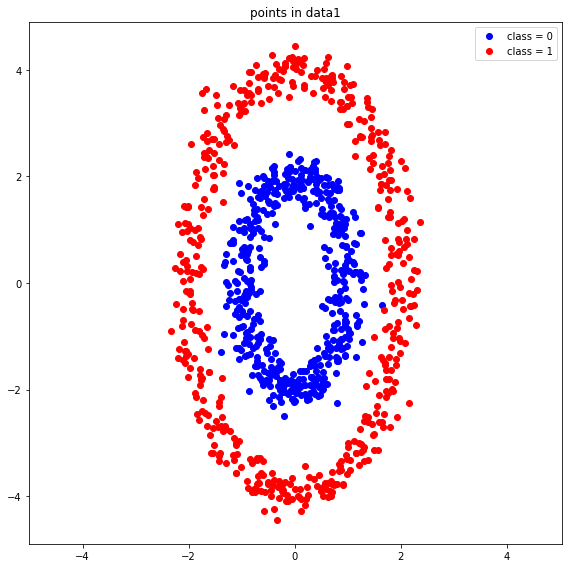

In [675]:
f = plt.figure(figsize=(8,8))   

plt.title('points in data1')
plt.plot(data1_point_x_class_0, data1_point_y_class_0, 'o', color='blue', label='class = 0')
plt.plot(data1_point_x_class_1, data1_point_y_class_1, 'o', color='red', label='class = 1')
plt.axis('equal')
plt.legend()
plt.tight_layout()
plt.show()

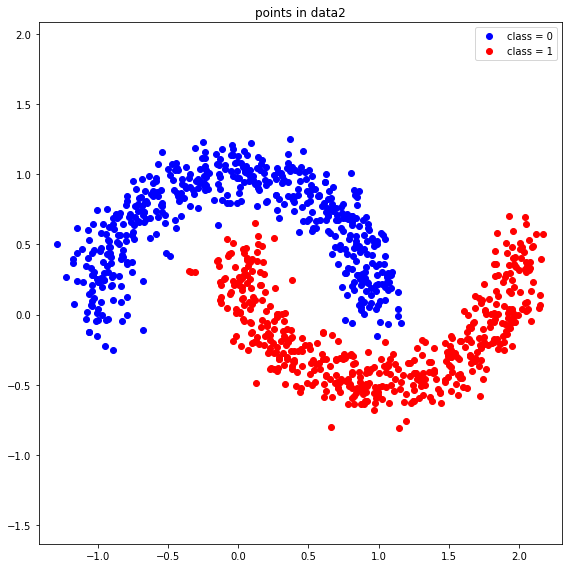

In [676]:
f = plt.figure(figsize=(8,8))   

plt.title('points in data2')
plt.plot(data2_point_x_class_0, data2_point_y_class_0, 'o', color='blue', label='class = 0')
plt.plot(data2_point_x_class_1, data2_point_y_class_1, 'o', color='red', label='class = 1')
plt.axis('equal')
plt.legend()
plt.tight_layout()
plt.show()

## define the feature functions

- feature vector is defined by $(1, f_1(x, y), f_2(x, y), \cdots, f_{k-1}(x, y)) \in \mathbb{R}^k$

In [677]:
def compute_feature1(point):

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    # print(point)
    # print(point.size)
    # feature = np.array([np.ones(point.size), point[:,0],point[:,1], point[:,0]**2, point[:,1]**2])
    
    feature = np.zeros((point[:,0].size,5))
    feature[:,0] =point[:,0]**2
    feature[:,1] = point[:,0] 
    feature[:,2] = point[:,1]**2
    feature[:,3] = point[:,1]
    feature[:,4] = np.ones(point[:,0].size)
   
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    return feature
feature1=compute_feature1(data1_point)
# print(data1_point)

In [678]:
def compute_feature2(point):

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    # feature = np.array([np.ones(point.size), point[:,0],point[:,0]**2, point[:,0]**3, point[:,1]])
    feature = np.zeros((point[:,0].size,5))
    feature[:,0] = point[:,0]**3
    feature[:,1] = point[:,0]**2
    feature[:,2] = point[:,0]
    feature[:,3] = point[:,1]
    feature[:,4] = np.ones(point[:,0].size)

    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    return feature
# feature2=compute_feature2(data2_point)

## define the linear regression function

- $\theta = (\theta_0, \theta_1, \cdots, \theta_{k-1}) \in \mathbb{R}^k$
- feature = $(1, f_1(x, y), \cdots, f_{k-1}(x, y)) \in \mathbb{R}^k$

In [679]:
def compute_linear_regression(theta, feature):

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    # print(theta)
    # print(feature)
    value = feature.dot(theta.T)

    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    return value
theta11=np.ones(5)
regression1=compute_linear_regression(theta11,feature1)
# print(regression1)
 

## define sigmoid function with input

- $z \in \mathbb{R}$

In [680]:
def sigmoid(z):

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    
    value = 1/(1+np.exp((-1)*z))

    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    return value 

## define the logistic regression function

- $\theta = (\theta_0, \theta_1, \cdots, \theta_{k-1}) \in \mathbb{R}^k$
- feature $= (1, f_1(x, y), \cdots, f_{k-1}(x, y) \in \mathbb{R}^k$

In [681]:
def compute_logistic_regression(theta, feature):

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #

    f = compute_linear_regression(theta, feature)
    value = sigmoid(f)

    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    return value

# print(compute_logistic_regression(theta11, feature1))

## define the residual function

- $\theta = (\theta_0, \theta_1, \cdots, \theta_{k-1}) \in \mathbb{R}^k$
- feature $= (1, f_1(x, y), \cdots, f_{k-1}(x, y) \in \mathbb{R}^k$
- label $= l \in \{0, 1\}^k$

In [682]:
def compute_residual(theta, feature, label):

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    
    label = label.flatten()
    h = compute_logistic_regression(theta, feature)
    residual = (-1)*label*np.log(h) - (1-label)*np.log(1-h)

    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    return residual

# print(compute_residual(theta11, feature1, data1_label))

## define the loss function for the logistic regression

- $\theta = (\theta_0, \theta_1, \cdots, \theta_{k-1}) \in \mathbb{R}^k$
- feature $= (1, f_1(x, y), \cdots, f_{k-1}(x, y) \in \mathbb{R}^k$
- label $= l \in \{0, 1\}^k$

In [683]:
def compute_loss(theta, feature, label):

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #

    loss = np.sum(compute_residual(theta, feature, label))/len(label)
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    return loss
# print(compute_loss(theta11, feature1, data1_label))

## define the gradient of the loss with respect to the model parameter $\theta$

- $\theta = (\theta_0, \theta_1, \cdots, \theta_{k-1}) \in \mathbb{R}^k$
- feature $= (1, f_1(x, y), \cdots, f_{k-1}(x, y) \in \mathbb{R}^k$
- label $= l \in \{0, 1\}^k$

In [684]:
def compute_gradient(theta, feature, label):

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    # x = np.ones(feature.shape[0])
    # x = np.append(x, feature[:, 1], axis=0)
    # x = np.append(x, feature[:, 2], axis=0)
    # x = np.reshape(x, (3, feature.shape[0]))
    # x = x.T 
    gradient = np.zeros(theta.size)
    
    h = (compute_logistic_regression(theta, feature) - label.flatten())
    
    gradient = (h.dot(feature))/len(label)

    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    return gradient

print(compute_gradient(theta11, feature1, data1_label))

# input3  = np.array([[0], [1]])
# print(input3)
# input3 = input3.flatten()

# print(input3.flatten().flatten())

[0.22415595 0.02816261 0.97048724 0.03195088 0.45655923]


## compute the accuracy of the prediction for point with a given model parameter

In [685]:
def compute_accuracy(theta, feature, label):

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    h = np.array(compute_logistic_regression(theta, feature))
    accuracy = 0
    # print(label)
    for i in range(len(label)):
        if h[i]>=0.5:
            h[i] =1
        else:
            h[i] =0
    for i in range(len(label)):
        if h[i] == label[i]:
            accuracy = accuracy + 1
    accuracy = accuracy/len(label)
    

    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    return accuracy
accurancy=compute_accuracy(theta11,feature1,data1_label)
print(accurancy)

0.5


## initialize the gradient descent algorithm

In [686]:
data1_number_iteration   = 10000
data2_number_iteration   = 10000

data1_learning_rate   = 0.003 
data2_learning_rate   = 0.003

data1_number_feature    = 5
data2_number_feature    = 5 

theta1  = np.zeros(data1_number_feature)
theta2  = np.zeros(data2_number_feature)

data1_loss_iteration  = np.zeros(data1_number_iteration)
data2_loss_iteration  = np.zeros(data2_number_iteration)

data1_accuracy_iteration    = np.zeros(data1_number_iteration)
data2_accuracy_iteration    = np.zeros(data2_number_iteration)

## run the gradient descent algorithm to optimize the loss function with respect to the model parameter

In [687]:
feature1 = compute_feature1(data1)
for i in range(data1_number_iteration):

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    theta1      = theta1 - data1_learning_rate * compute_gradient(theta1, feature1, data1_label)
    loss1       = compute_loss(theta1, feature1, data1_label)
    accuracy1   = compute_accuracy(theta1, feature1, data1_label)

    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    data1_loss_iteration[i]     = loss1
    data1_accuracy_iteration[i] = accuracy1

data1_theta_optimal = theta1

In [688]:
feature2 = compute_feature2(data2)
for i in range(data2_number_iteration):
    
    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    theta2      = theta2 - data2_learning_rate * compute_gradient(theta2, feature2, data2_label)
    loss2       = compute_loss(theta2, feature2, data2_label)
    accuracy2   = compute_accuracy(theta2, feature2, data2_label)

    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    data2_loss_iteration[i]     = loss2
    data2_accuracy_iteration[i] = accuracy2

data2_theta_optimal = theta2

___

___

## functions for presenting the results

___

___

In [689]:
def function_result_01():

    print("final loss for data1 = {:13.10f}".format(data1_loss_iteration[-1]))

In [690]:
def function_result_02():

    print("final loss for data2 = {:13.10f}".format(data2_loss_iteration[-1]))

In [691]:
def function_result_03():

    print("final accuracy for data1 = {:13.10f}".format(data1_accuracy_iteration[-1]))

In [692]:
def function_result_04():

    print("final accuracy for data2 = {:13.10f}".format(data2_accuracy_iteration[-1]))

In [693]:
def function_result_05():
    
    plt.figure(figsize=(8,6))
    plt.title('loss for data1')

    plt.plot(data1_loss_iteration, '-', color='red')
    plt.xlabel('iteration')
    plt.ylabel('loss')

    plt.tight_layout()
    plt.show()

In [694]:
def function_result_06():

    plt.figure(figsize=(8,6))
    plt.title('loss for data2')

    plt.plot(data2_loss_iteration, '-', color='red')
    plt.xlabel('iteration')
    plt.ylabel('loss')

    plt.tight_layout()
    plt.show()

In [695]:
def function_result_07():
    
    plt.figure(figsize=(8,6))
    plt.title('accuracy for data1')

    plt.plot(data1_accuracy_iteration, '-', color='red')
    plt.xlabel('iteration')
    plt.ylabel('accuracy')

    plt.tight_layout()
    plt.show()

In [696]:
def function_result_08():
    
    plt.figure(figsize=(8,6))
    plt.title('accuracy for data2')

    plt.plot(data2_accuracy_iteration, '-', color='red')
    plt.xlabel('iteration')
    plt.ylabel('accuracy')

    plt.tight_layout()
    plt.show()

## plot the linear regression values over the 2-dimensional Euclidean space and superimpose the training data

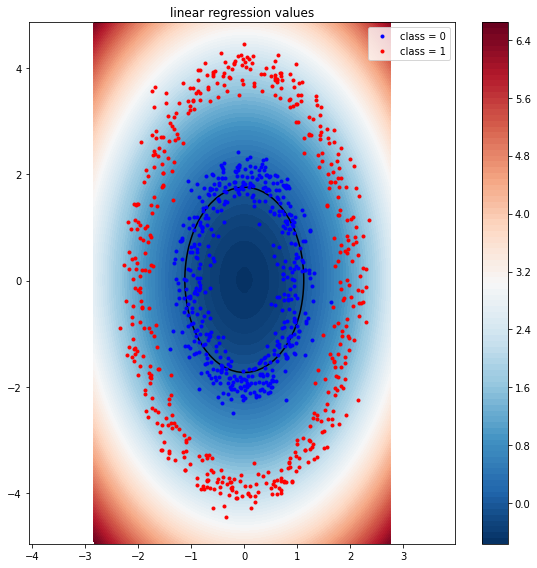

In [697]:
def function_result_09():

    plt.figure(figsize=(8,8)) # USE THIS VALUE for the size of the figure
    plt.title('linear regression values')
    
    min_x   = np.min(data1_point_x)
    max_x   = np.max(data1_point_x)
    min_y   = np.min(data1_point_y)
    max_y   = np.max(data1_point_y)

    X = np.arange(min_x - 0.5, max_x + 0.5, 0.1) # USE THIS VALUE for the range of x values in the construction of coordinate
    Y = np.arange(min_y - 0.5, max_y + 0.5, 0.1) # USE THIS VALUE for the range of y values in the construction of coordinate
    
    [XX, YY] = np.meshgrid(X, Y)
    
    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    X_Flatten = np.matrix.flatten(XX)
    Y_Flatten = np.matrix.flatten(YY)
    point_data = np.stack([X_Flatten, Y_Flatten], 1)
    
    feature_1 = compute_feature1(point_data)
    
    linear_regression_1 = compute_linear_regression(theta1, feature_1)
    reg1 = np.reshape(linear_regression_1, XX.shape)
    
    plt.contourf(XX, YY, reg1, levels = 100, cmap='RdBu_r')
    plt.colorbar()
    
    plt.contour(XX, YY, reg1, levels=0, colors='black')
    plt.plot(data1_point_x_class_0, data1_point_y_class_0, '.', color='blue', label= 'class = 0')
    plt.plot(data1_point_x_class_1, data1_point_y_class_1, '.', color='red', label= 'class = 1')


    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    plt.axis('equal')
    plt.legend()
    plt.tight_layout()
    plt.show()
    
function_result_09()

In [698]:
def function_result_10():
    
    plt.figure(figsize=(8,8)) # USE THIS VALUE for the size of the figure
    plt.title('linear regression values')
    
    min_x   = np.min(data2_point_x)
    max_x   = np.max(data2_point_x)
    min_y   = np.min(data2_point_y)
    max_y   = np.max(data2_point_y)

    X = np.arange(min_x - 0.5, max_x + 0.5, 0.1) # USE THIS VALUE for the range of x values in the construction of coordinate
    Y = np.arange(min_y - 0.5, max_y + 0.5, 0.1) # USE THIS VALUE for the range of y values in the construction of coordinate

    [XX, YY] = np.meshgrid(X, Y)

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    X_Flatten = np.matrix.flatten(XX)
    Y_Flatten = np.matrix.flatten(YY)
    point_data = np.stack([X_Flatten, Y_Flatten], 1)
    
    feature_2 = compute_feature2(point_data)
    
    linear_regression_2 = compute_linear_regression(theta2, feature_2)
    reg2 = np.reshape(linear_regression_2, XX.shape)
    
    plt.contourf(XX, YY, reg2, levels = 100, cmap='RdBu_r')
    plt.colorbar()
    plt.contour(XX, YY, reg2, levels=0, colors='black')
    
    plt.plot(data2_point_x_class_0, data2_point_y_class_0, '.', color='blue', label= 'class = 0')
    plt.plot(data2_point_x_class_1, data2_point_y_class_1, '.', color='red', label= 'class = 1')

    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    plt.axis('equal')
    plt.legend()
    plt.tight_layout()
    plt.show()

## plot the logistic regression values over the 2-dimensional Euclidean space

In [699]:
def function_result_11():

    plt.figure(figsize=(8,8)) # USE THIS VALUE for the size of the figure
    plt.title('logistic regression values')
    
    min_x   = np.min(data1_point_x)
    max_x   = np.max(data1_point_x)
    min_y   = np.min(data1_point_y)
    max_y   = np.max(data1_point_y)

    X = np.arange(min_x - 0.5, max_x + 0.5, 0.1) # USE THIS VALUE for the range of x values in the construction of coordinate
    Y = np.arange(min_y - 0.5, max_y + 0.5, 0.1) # USE THIS VALUE for the range of y values in the construction of coordinate

    [XX, YY] = np.meshgrid(X, Y)

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    X_Flatten = np.matrix.flatten(XX)
    Y_Flatten = np.matrix.flatten(YY)
    point_data = np.stack([X_Flatten, Y_Flatten], 1)
    
    feature_1 = compute_feature1(point_data)
    
    logistic_regression_1 = compute_logistic_regression(theta1, feature_1)
    log1 = np.reshape(logistic_regression_1, YY.shape)
    
    plt.contourf(XX, YY, log1, levels = 100, cmap='RdBu_r')
    plt.colorbar()
    plt.contour(XX, YY, log1, levels=0, colors='black')
    
    plt.plot(data1_point_x_class_0, data1_point_y_class_0, '.', color='blue', label= 'class = 0')
    plt.plot(data1_point_x_class_1, data1_point_y_class_1, '.', color='red', label= 'class = 1')

    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    plt.axis('equal')
    plt.legend()
    plt.tight_layout()
    plt.show()

In [700]:
def function_result_12():
    
    plt.figure(figsize=(8,8)) # USE THIS VALUE for the size of the figure
    plt.title('logistic regression values')

    min_x   = np.min(data2_point_x)
    max_x   = np.max(data2_point_x)
    min_y   = np.min(data2_point_y)
    max_y   = np.max(data2_point_y)

    X = np.arange(min_x - 0.5, max_x + 0.5, 0.1) # USE THIS VALUE for the range of x values in the construction of coordinate
    Y = np.arange(min_y - 0.5, max_y + 0.5, 0.1) # USE THIS VALUE for the range of y values in the construction of coordinate

    [XX, YY] = np.meshgrid(X, Y)

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    X_Flatten = np.matrix.flatten(XX)
    Y_Flatten = np.matrix.flatten(YY)
    point_data = np.stack([X_Flatten, Y_Flatten], 1)
    
    feature_2 = compute_feature2(point_data)
    
    logistic_regression_2 = compute_logistic_regression(theta2, feature_2)
    log2 = np.reshape(logistic_regression_2, YY.shape)
    
    plt.contourf(XX, YY, log2, levels = 100, cmap='RdBu_r')
    plt.colorbar()
    plt.contour(XX, YY, log2, levels=0, colors='black')
    
    plt.plot(data2_point_x_class_0, data2_point_y_class_0, '.', color='blue', label= 'class = 0')
    plt.plot(data2_point_x_class_1, data2_point_y_class_1, '.', color='red', label= 'class = 1')

    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    plt.axis('equal')
    plt.legend()
    plt.tight_layout()
    plt.show()

___

___

## results

___

___

**************************************************
## [RESULT 01]
**************************************************
final loss for data1 =  0.4590857044
**************************************************
## [RESULT 02]
**************************************************
final loss for data2 =  0.4498930253
**************************************************
## [RESULT 03]
**************************************************
final accuracy for data1 =  0.7120000000
**************************************************
## [RESULT 04]
**************************************************
final accuracy for data2 =  0.7860000000
**************************************************
## [RESULT 05]
**************************************************


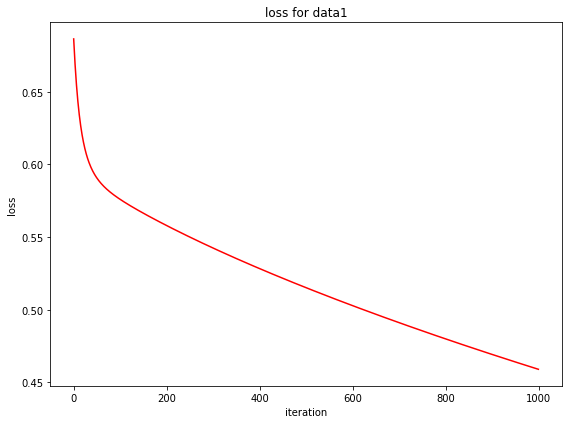

**************************************************
## [RESULT 06]
**************************************************


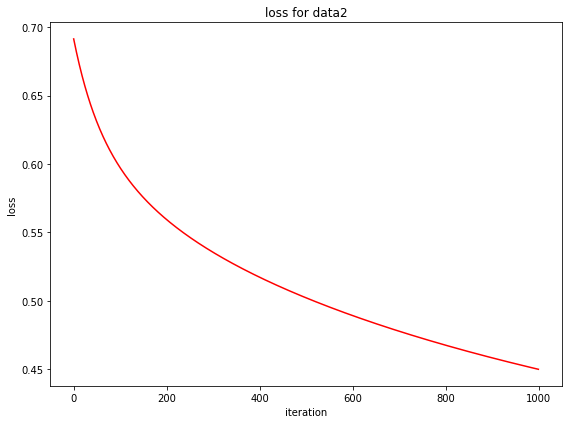

**************************************************
## [RESULT 07]
**************************************************


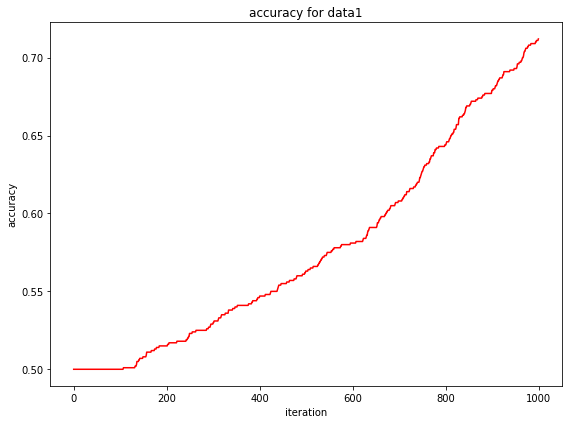

**************************************************
## [RESULT 08]
**************************************************


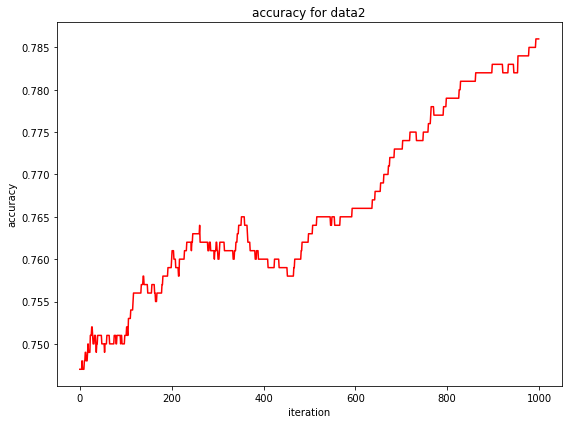

**************************************************
## [RESULT 09]
**************************************************


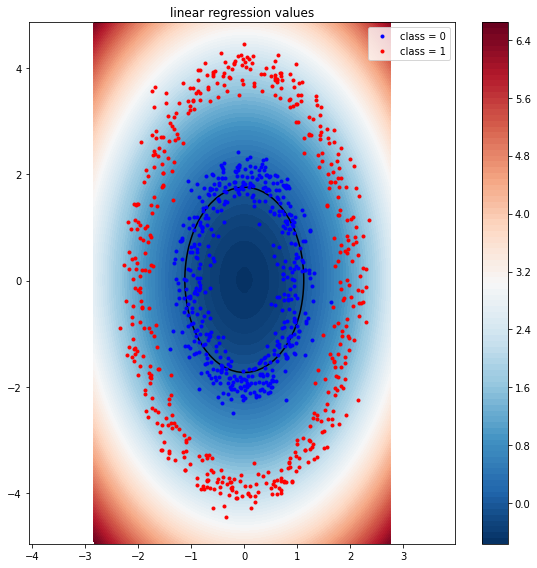

**************************************************
## [RESULT 10]
**************************************************


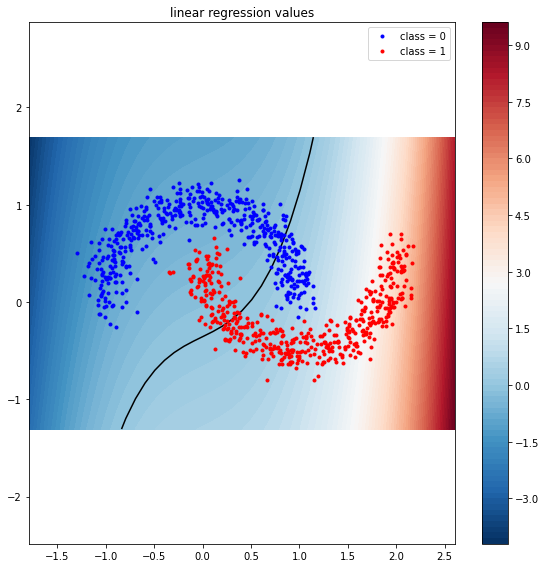

**************************************************
## [RESULT 11]
**************************************************


C:\Users\eehaein\AppData\Local\Temp\ipykernel_16988\3438447849.py:30: UserWarning: The following kwargs were not used by contour: 'color'
  plt.contour(XX, YY, log1, levels=0, color='black')


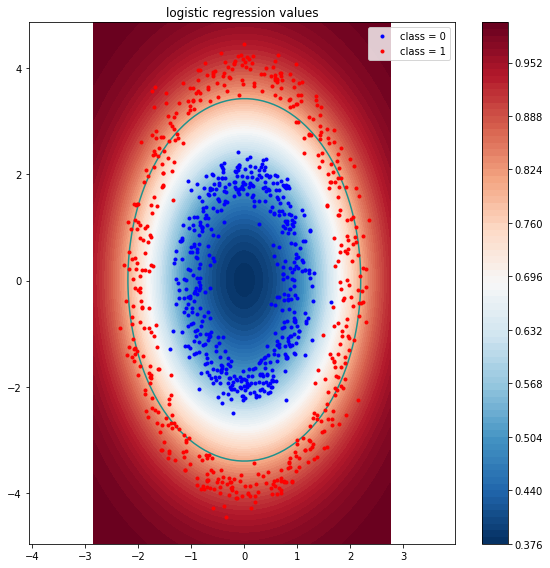

**************************************************
## [RESULT 12]
**************************************************


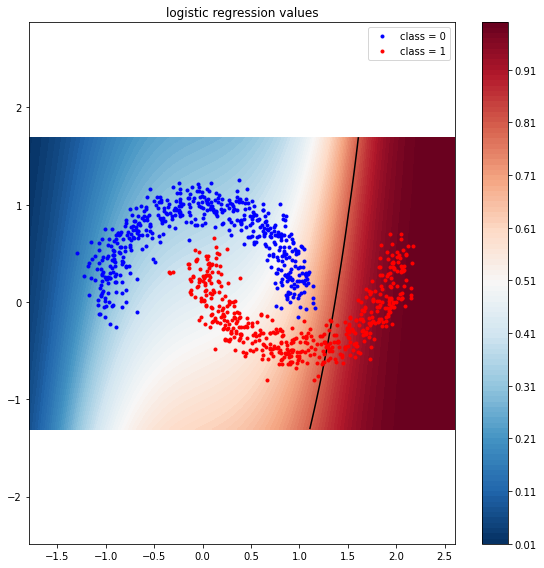

In [701]:
number_result = 12

for i in range(number_result):
    title = '## [RESULT {:02d}]'.format(i+1)
    name_function = 'function_result_{:02d}()'.format(i+1)

    print('**************************************************')
    print(title)
    print('**************************************************')
    eval(name_function)